In [1]:
import tensorflow as tf
from tensorflow import keras 
from keras.models import Sequential 
from keras.layers import Flatten , Dense , MaxPool2D , Conv2D , BatchNormalization , Dropout
from keras.regularizers import L2

c:\Users\Acer\anaconda3\envs\py310\lib\site-packages\google\api_core\_python_version_support.py:275: FutureWarning: You are using a Python version (3.10.19) which Google will stop supporting in new releases of google.api_core once it reaches its end of life (2026-10-04). Please upgrade to the latest Python version, or at least Python 3.11, to continue receiving updates for google.api_core past that date.
  warnings.warn(message, FutureWarning)


In [2]:
# Using generators => Generator helps to load mini batch data into ram instead of all data directly. 
train_ds = keras.utils.image_dataset_from_directory(
    directory=r'C:\Users\Acer\OneDrive\Desktop\CatVsDog\dataset\train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)
validation_ds = keras.utils.image_dataset_from_directory(
    directory=r'C:\Users\Acer\OneDrive\Desktop\CatVsDog\dataset\test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)

Found 19992 files belonging to 2 classes.
Found 4999 files belonging to 2 classes.


In [3]:
# Normalize
def process(image , label):
    image = tf.cast(image/255 , tf.float32)
    return image , label 

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [4]:
# CNN model

model = Sequential()

model.add(Conv2D(32 , kernel_size= (3,3)  , activation= 'relu' , input_shape= (256 , 256 , 3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size= (2,2) , strides= 2))

model.add(Conv2D(64 , kernel_size= (3,3)  , activation= 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size= (2,2) , strides= 2))

model.add(Conv2D(128 , kernel_size= (3,3) , activation= 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size= (2,2) , strides= 2))

model.add(Flatten())

model.add(Dense(128 , activation= 'relu'))
model.add(Dropout(0.2))
model.add(Dense(64 , activation= 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1 , activation= 'sigmoid'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [6]:
model.compile(optimizer= 'adam' , loss= 'binary_crossentropy' , metrics= ['accuracy'])

In [7]:
history = model.fit(train_ds , epochs= 20 , validation_data= validation_ds)

Epoch 1/20
625/625 [==============================] - 84s 120ms/step - loss: 1.6252 - accuracy: 0.5549 - val_loss: 0.6637 - val_accuracy: 0.6129
Epoch 2/20
625/625 [==============================] - 73s 117ms/step - loss: 0.6399 - accuracy: 0.6444 - val_loss: 0.5839 - val_accuracy: 0.6729
Epoch 3/20
625/625 [==============================] - 73s 117ms/step - loss: 0.5585 - accuracy: 0.7124 - val_loss: 0.5286 - val_accuracy: 0.7335
Epoch 4/20
625/625 [==============================] - 74s 118ms/step - loss: 0.4933 - accuracy: 0.7633 - val_loss: 0.4711 - val_accuracy: 0.7786
Epoch 5/20
625/625 [==============================] - 74s 118ms/step - loss: 0.4412 - accuracy: 0.7945 - val_loss: 0.4744 - val_accuracy: 0.7914
Epoch 6/20
625/625 [==============================] - 74s 118ms/step - loss: 0.3832 - accuracy: 0.8322 - val_loss: 0.4342 - val_accuracy: 0.8012
Epoch 7/20
625/625 [==============================] - 73s 117ms/step - loss: 0.3198 - accuracy: 0.8637 - val_loss: 0.4500 - val_ac

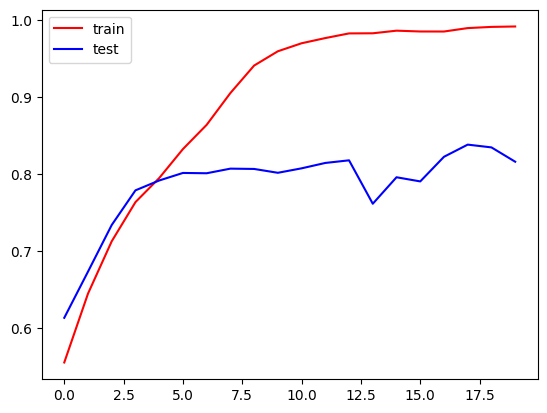

In [9]:
import matplotlib.pyplot as plt 

plt.plot(history.history['accuracy'] , color= 'red', label= 'train')
plt.plot(history.history['val_accuracy'] , color= 'blue', label= 'test')
plt.legend()
plt.show()

In [38]:
import cv2

In [52]:
test_img = cv2.imread('image3.png')
# Convert BGR to RGB
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

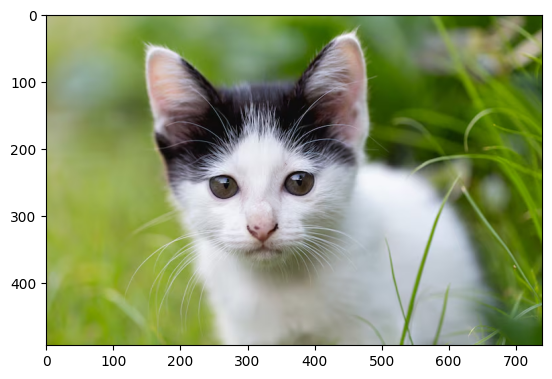

In [53]:
plt.imshow(test_img)

In [54]:
test_img = cv2.resize(test_img , (256 , 256))

In [55]:
test_img.shape

(256, 256, 3)

In [56]:
test_input = test_img.reshape(1,256,256,3)
# Normalize the image (divide by 255)
test_input = test_input / 255.0

In [57]:
model.predict(test_input)

1/1 [==============================] - 0s 39ms/step


array([[0.22263226]], dtype=float32)

In [58]:
# Interpret the result
prediction = model.predict(test_input)[0][0]
if prediction > 0.5:
    print(f"Dog (confidence: {prediction:.2%})")
else:
    print(f"Cat (confidence: {(1-prediction):.2%})")

1/1 [==============================] - 0s 35ms/step
Cat (confidence: 77.74%)
